In [1]:
import re
import numpy as np

with open('anna.txt', encoding='utf-8') as f:
    anna = f.read()
with open('sonets.txt', encoding='utf-8') as f:
    sonets = f.read()
    
anna_sentences = re.split(r'(?:[.]\s*){3}|[.?!]', anna)
sonet_sentences = re.split(r'(?:[.]\s*){3}|[.?!]', sonets)
letters = 'qwertyuiopasdfghjklzxcvbnmйцукенгшщзхъфывапролджэячсмитьбюё'

In [2]:
def lenchars(sentence):
    return sum(1 for i in sentence.lower() if i in letters)

In [3]:
from collections import Counter
def difletters(sentence):
    sentence=sentence.lower()
    cnt=Counter(sentence)
    d={letter:cnt[letter] for letter in letters}
    return sum(1 for i in d if d[i]!=0)

difletters(anna_sentences[1])

15

In [4]:
vocals='eyuioaёуеаоэяию'
def voc(sentence):
    return sum(1 for i in sentence.lower() if i in vocals)

voc(anna_sentences[1])

9

In [5]:
def lenwords(sentence):
    return np.median([len(word) for word in sentence.split()])

In [6]:
def lenvocals(sentence):
    return np.median([sum([1 for i in word if i in vocals]) for word in sentence.lower().split()])

In [7]:
anna_data = [(lenchars(sentence), difletters(sentence), voc(sentence), lenwords(sentence), lenvocals(sentence), 1) for sentence in anna_sentences]
sonet_data = [(lenchars(sentence), difletters(sentence), voc(sentence), lenwords(sentence), lenvocals(sentence), 0) for 
              sentence in sonet_sentences]

/home/religofsil/miniconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/religofsil/miniconda3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


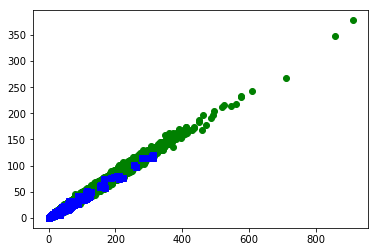

In [8]:
%matplotlib inline

from matplotlib import pyplot as plt
anna_data = np.array(anna_data)
sonet_data = np.array(sonet_data)
anna_data=np.where(np.isnan(anna_data), np.ma.array(anna_data, mask=np.isnan(anna_data)).mean(axis=0), anna_data)
sonet_data=np.where(np.isnan(sonet_data), np.ma.array(sonet_data, mask=np.isnan(sonet_data)).mean(axis=0), sonet_data)
plt.figure()
c1, c2 = 0, 2
plt.plot(anna_data[:,c1], anna_data[:,c2], 'og', 
         sonet_data[:,c1], sonet_data[:,c2], 'sb')
plt.show()

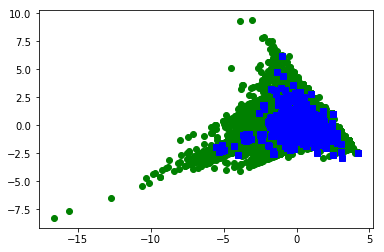

In [9]:
from matplotlib import mlab
data = np.vstack((anna_data, sonet_data))
p = mlab.PCA(data, True)
N = len(anna_data)
plt.plot(p.Y[:N,0], p.Y[:N,1], 'og', p.Y[N:,0], p.Y[N:,1], 'sb')

In [10]:
from sklearn.ensemble import RandomForestClassifier

In [11]:
forest = RandomForestClassifier()
np.random.shuffle(data)
train = data[:20000]
test = data[20000:]
forest = forest.fit(train[:, :-1], train[:, -1])

In [12]:
forest.feature_importances_

array([ 0.3228543 ,  0.18497634,  0.24996866,  0.1640164 ,  0.07818431])

In [13]:
forest.score(test[:, :-1], test[:, -1])

0.93430656934306566

In [14]:
errors=[]
for i in range(len(test)):
    if test[i][-1]!=forest.predict(test[i][:-1]):
        errors.append(test[i])

/home/religofsil/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/religofsil/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
/home/religofsil/miniconda3/lib/python3.5/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it cont

In [16]:
anna_data_w_sent = [(sentence, lenchars(sentence), difletters(sentence), voc(sentence), lenwords(sentence), lenvocals(sentence), 1) for sentence in anna_sentences]
sonet_data_w_sent = [(sentence, lenchars(sentence), difletters(sentence), voc(sentence), lenwords(sentence), lenvocals(sentence), 0) for 
              sentence in sonet_sentences]
anna_data_w_sent = np.array(anna_data_w_sent)
sonet_data_w_sent = np.array(sonet_data_w_sent)

/home/religofsil/miniconda3/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/religofsil/miniconda3/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [17]:
len(errors)

189

In [ ]:
for e in errors:
    for i in np.vstack((anna_data_w_sent, sonet_data_w_sent)):
        if np.equal(i[1:], e):
            print(i[0])

/home/religofsil/miniconda3/lib/python3.5/site-packages/ipykernel/__main__.py:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  app.launch_new_instance()



 

Лев Николаевич Толстой

Анна Каренина

Мне отмщение, и аз воздам

ЧАСТЬ ПЕРВАЯ

I

   Все счастливые семьи похожи друг на друга, каждая несчастливая семья несчастлива по-своему

   Все смешалось в доме Облонских
 Жена узнала, что муж был в связи с бывшею в их доме француженкою-гувернанткой, и объявила мужу, что не может жить с ним в одном доме
 Положение это продолжалось уже третий день и мучительно чувствовалось и самими супругами, и всеми членами семьи, и домочадцами
 Все члены семьи и домочадцы чувствовали, что нет смысла в их сожительстве и что на каждом постоялом дворе случайно сошедшиеся люди более связаны между собой, чем они, члены семьи и домочадцы Облонских
 Жена не выходила из своих комнат, мужа третий день не было дома
 Дети бегали по всему дому, как потерянные; англичанка поссорилась с экономкой и написала записку приятельнице, прося приискать ей новое место; повар ушел еще вчера со двора, во время обеда; черная кухарка и кучер просили расчета

   На третий день после 

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''